In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#uploading the filtred database
filtred_db = pd.read_csv('filtred.csv')
filtred_db

,Sender,Receiver,Date,Provenance,Destination,Subject,Cited names,Reference,Year,Incipit
0,Viviani Vincenzo,Ricci Michelangelo,20/05/1646,Firenze,Roma,NaN,"Torricelli, Evangelista, 1608-1647,(citato.)Ri...","Gal. 157, doc. 1, c. 1r-v",1646,"""Come posso non aggradire con particolare ambi..."
1,Viviani Vincenzo,Renieri Vincenzo,13/04/1647,Firenze,Pisa,NaN,"Torricelli, Evangelista, 1608-1647,(citato.)Re...","Gal. 157, doc. 2, c. 3r",1647,"""Reputo a mio gran favore che Vostra Signoria ..."
2,Viviani Vincenzo,Ricci Michelangelo,24/11/1648,Firenze,Roma,NaN,"Torricelli, Evangelista, 1608-1647,(citato.)Ri...","Gal. 157, doc. 3, c. 4r-v",1648,"""L'esser io per spazio d'un mese in circa stat..."
3,Viviani Vincenzo,Manetti Braccio,18/10/1651,Firenze,Firenze,NaN,"Cecchi, Andrea, sec. XVII,(citato.)Arrighetti,...","Gal. 157, doc. 4, c. 5r",1651,"""Haverei necessità di parlare a Vostra Signori..."
4,Viviani Vincenzo,Viviani Alamanno,23/02/1652,Firenze,NaN,Argomenti privati,"Di Pietro, sec. XVII,(citato.)Viviani, Alamann...","Gal. 157, doc. 5, c. 7r",1652,"""Qui tutto giorno ci viene gente a cercar di V..."
...,...,...,...,...,...,...,...,...,...,...
3258,Viviani Vincenzo,Magalotti Lorenzo,[sd],NaN,NaN,NaN,"Democritus, ca. 460-ca. 370 a.C.,(citato.)Maga...","Gal. 283, doc. 30, c. 55r-56v",[sd],"""Così cadano dal Cielo in segno d'applauso sop..."
3259,Magalotti Lorenzo,Viviani Vincenzo,[sd],NaN,NaN,NaN,"Viviani, Vincenzo, 1622-1703,(destinatario.)","Gal. 283, doc. 31, c. 57r-59v",[sd],"""Tra gli applausi della nostra vittoria non s..."
3260,Steensen Niels,Viviani Vincenzo,[sd],NaN,NaN,NaN,"Viviani, Vincenzo, 1622-1703,(destinatario.)","Gal. 285, doc. 40, c. 69r-v",[sd],"""Mi scusi di non esser stato da lei questi gio..."
3261,Viviani Vincenzo,"Ferdinando (II, granduca di Toscana)",[sd],NaN,NaN,NaN,"Ferdinando II, granduca di Toscana, 1610-1670,...","Gal. 286, doc. 23, c. 39r-40r",[sd],"""Se le velocità de moti di tutti i suoni...""Au..."


In [8]:
#uploading the filtred database
sent = pd.read_csv('sent.csv')
received = pd.read_csv('received.csv')

In [280]:
sent = filtred_db.loc[filtred_db['Sender'].str.contains('Viviani Vincenzo', na=False)]
received = filtred_db.loc[filtred_db['Receiver'].str.contains('Viviani Vincenzo', na=False)]

# Histograms

In [283]:
received.Provenance.value_counts().nlargest(15)

Roma         378
Pisa         292
Firenze      175
Parigi       125
Bologna       81
Livorno       77
Venezia       65
Siena         51
Prato         35
Milano        34
Urbino        29
Pistoia       29
Campestri     29
Napoli        29
Bergamo       23
Name: Provenance, dtype: int64

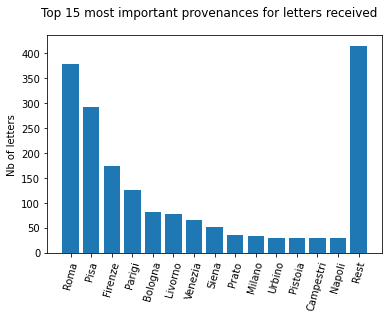

In [395]:
nb_prov_received = len(received.Provenance.unique())
rest_prov_received = sum(received.Provenance.value_counts()[15:nb_prov_received])



top_15 = received.Provenance.value_counts().nlargest(15)
top_15[14] = rest_prov_received
top_15 = top_15.rename(index={'Bergamo':'Rest'})
plt.bar(top_15.index, top_15.values)
plt.xticks(rotation='75')
plt.suptitle('Top 15 most important provenances for letters received')
plt.ylabel('Nb of letters')
plt.savefig('prov_received.png',dpi=400, bbox_inches='tight')

In [285]:
received.Destination.value_counts().nlargest(6)

Firenze            1396
Roma                 16
Chiusi               11
Poggio a Caiano       7
Sartiano              4
Livorno               2
Name: Destination, dtype: int64

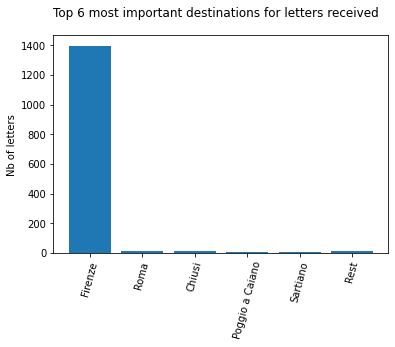

In [394]:
nb_dest_received = len(received.Destination.unique())
rest_dest_received = sum(received.Destination.value_counts()[6:nb_dest_received])

top_6 = received.Destination.value_counts().nlargest(6)
top_6[5] = rest_dest_received
top_6 = top_6.rename(index={'Livorno':'Rest'})
plt.bar(top_6.index, top_6.values)
plt.xticks(rotation='75')
plt.suptitle('Top 6 most important destinations for letters received')
plt.ylabel('Nb of letters')
plt.savefig('dest_received.png',dpi=400, bbox_inches='tight')

In [287]:
sent.Provenance.value_counts().nlargest(6)

Firenze        714
Roma            44
Chiusi          31
Sarteano        14
Livorno          5
Montevarchi      4
Name: Provenance, dtype: int64

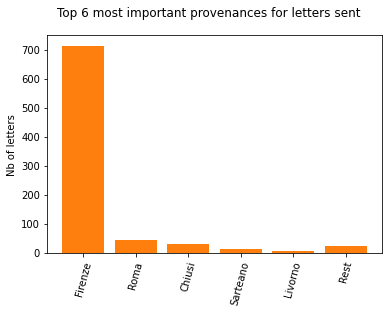

In [399]:
nb_prov_sent = len(sent.Provenance.unique())
rest_prov_sent = sum(sent.Provenance.value_counts()[6:nb_prov_sent])

top_6 = sent.Provenance.value_counts().nlargest(6)
top_6[5] = rest_prov_sent
top_6 = top_6.rename(index={'Montevarchi':'Rest'})
plt.bar(top_6.index, top_6.values, color='tab:orange')
plt.xticks(rotation='75')
plt.suptitle('Top 6 most important provenances for letters sent')
plt.ylabel('Nb of letters')
plt.savefig('prov_sent.png',dpi=400, bbox_inches='tight')

In [289]:
sent.Destination.value_counts().nlargest(15)

Roma         154
Firenze      104
Parigi       101
Pisa          40
Padova        22
Bologna       19
Livorno       18
Napoli        10
Milano        10
Venezia        9
Londra         8
Siena          7
Pistoia        5
Amsterdam      5
Mantova        3
Name: Destination, dtype: int64

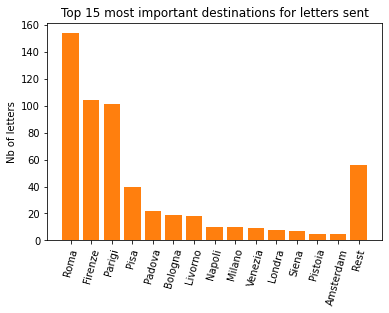

In [398]:
nb_dest_sent = len(sent.Destination.unique())
rest_dest_sent = sum(sent.Destination.value_counts()[15:nb_dest_sent])

top_15 = sent.Destination.value_counts().nlargest(15)
top_15[14] = rest_dest_sent
top_15 = top_15.rename(index={'Mantova':'Rest'})
plt.bar(top_15.index, top_15.values, color='tab:orange')
plt.xticks(rotation='75')
plt.title('Top 15 most important destinations for letters sent')
plt.ylabel('Nb of letters')
plt.savefig('dest_sent.png', dpi=400, bbox_inches='tight')

In [291]:
#Selecting only letters with year mentioned
filtred_dated = filtred_db.loc[filtred_db['Year'].str.find('Unidentified') != 0]
filtred_dated = filtred_dated.loc[filtred_dated['Year'].str.contains('iari') == 0]
filtred_dated = filtred_dated.loc[filtred_dated['Year'].str.contains('sd') == 0]
len(filtred_dated)

2995

# Letters sent to and received from Soutwhell per year

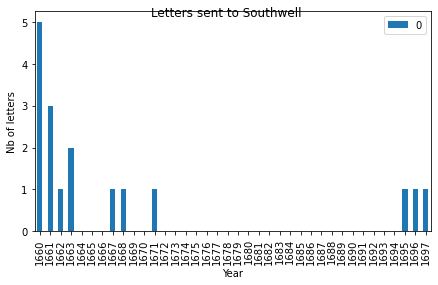

In [293]:
#Going through all years for Southwell
sent_southwell = filtred_dated.loc[filtred_dated['Receiver'].str.find('Southwell') != -1]
indices = [i for i in range(1660,1698)]

temp = sent_southwell.value_counts('Year').to_frame()
temp.index = temp.index.astype("int")
temp = temp.reindex(indices, fill_value=0)

temp.sort_index().plot(kind = 'bar')
#plt.bar(indices, sent_southwell.value_counts('Year')[indices])
plt.tight_layout()
plt.suptitle('Letters sent to Southwell')
plt.ylabel('Nb of letters')
plt.savefig('Sent to southwell.png', dpi=150)

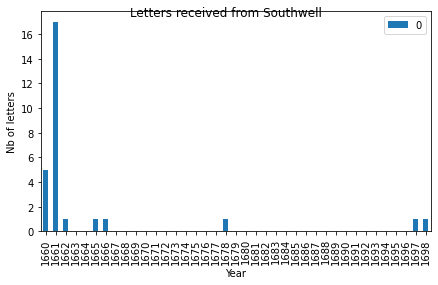

In [294]:
received_southwell = filtred_dated.loc[filtred_dated['Sender'].str.find('Southwell') != -1]
indices = [i for i in range(1660,1699)]

temp = received_southwell.value_counts('Year').to_frame()
temp.index = temp.index.astype("int")
temp = temp.reindex(indices, fill_value=0)

temp.sort_index().plot(kind = 'bar')
plt.tight_layout()
plt.ylabel('Nb of letters')
plt.suptitle('Letters received from Southwell')
plt.savefig('Sent by southwell.png', dpi=150)

# Letters sent to and received from Borelli per year

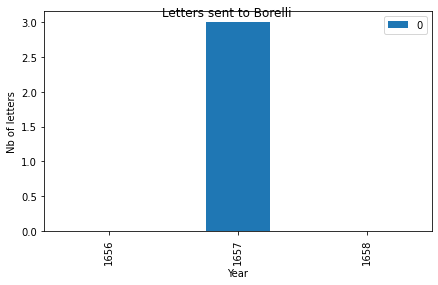

In [297]:
#Going through all years for Borelli
sent_borelli = filtred_dated.loc[filtred_dated['Receiver'].str.find('Borelli') != -1]
indices = [i for i in range(1656,1659)]

temp = sent_borelli.value_counts('Year').to_frame()
temp.index = temp.index.astype("int")
temp = temp.reindex(indices, fill_value=0)

temp.sort_index().plot(kind = 'bar')
plt.tight_layout()
plt.suptitle('Letters sent to Borelli')
plt.ylabel('Nb of letters')
plt.savefig('Sent to Borelli.png', dpi=150)

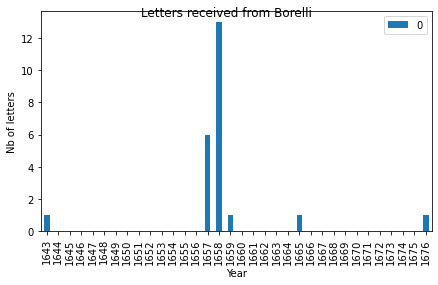

In [301]:
received_borelli = filtred_dated.loc[filtred_dated['Sender'].str.find('Borelli') != -1]
indices = [i for i in range(1643,1677)]

temp = received_borelli.value_counts('Year').to_frame()
temp.index = temp.index.astype("int")
temp = temp.reindex(indices, fill_value=0)

temp.sort_index().plot(kind = 'bar')
plt.tight_layout()
plt.suptitle('Letters received from Borelli')
plt.ylabel('Nb of letters')
plt.savefig('Received from Borelli.png', dpi=150)

# Top 10 correpondents of all time

In [302]:
top_10 = filtred_db['Sender'].value_counts().add(filtred_db['Receiver'].value_counts(),fill_value=0)
top_10 = top_10.drop(index = ('Viviani Vincenzo' ))
top_10 = top_10.drop(index = ('[non identificato]' ))
top_10 = top_10.sort_values(ascending = False).nlargest(10)
top_10

Molara Bruto (della)          243.0
Viviani Francesco             120.0
Galilei Cosimo                 91.0
Ricci Michelangelo             76.0
Dati Carlo Roberto             67.0
Micalori Giovanni Battista     54.0
Magalotti Lorenzo              53.0
Southwell Robert               48.0
Roti Michele                   44.0
Montanari Geminiano            42.0
dtype: float64

In [303]:
#Going through all years for top 10 correspondants 
db_top_10 = filtred_db.loc[filtred_db['Sender'].isin(top_10.index) | filtred_db['Receiver'].isin(top_10.index)]
db_top_10

,Sender,Receiver,Date,Provenance,Destination,Subject,Cited names,Reference,Year,Incipit
0,Viviani Vincenzo,Ricci Michelangelo,20/05/1646,Firenze,Roma,NaN,"Torricelli, Evangelista, 1608-1647,(citato.)Ri...","Gal. 157, doc. 1, c. 1r-v",1646,"""Come posso non aggradire con particolare ambi..."
2,Viviani Vincenzo,Ricci Michelangelo,24/11/1648,Firenze,Roma,NaN,"Torricelli, Evangelista, 1608-1647,(citato.)Ri...","Gal. 157, doc. 3, c. 4r-v",1648,"""L'esser io per spazio d'un mese in circa stat..."
9,Viviani Vincenzo,Galilei Cosimo,21/03/1655,Firenze,Pisa,NaN,"Galilei, Cosimo, 1636-1672,(destinatario.)Apol...","Gal. 157, doc. 10, c. 13r-14r",1655,"""Dalle due scorse de' 13 e 14 stante aviamo pr..."
23,Viviani Vincenzo,Magalotti Lorenzo,11/09/1657,Firenze,NaN,NaN,"Magalotti, Lorenzo, 1637-1712,(destinatario.)","Gal. 157, doc. 24, c. 34r",1657,"""Vengo richiesto da un Cavaliere Forestiero di..."
30,Viviani Vincenzo,Molara Bruto (della),25/05/1658,Firenze,NaN,Argomenti privati,"Nardi, Giovanni, 1585-1654,(citato.)Molara, Br...","Gal. 157, doc. 31, c. 44r",1658,"""Tarde non furon mai grazie divine, che tale i..."
...,...,...,...,...,...,...,...,...,...,...
3206,Galilei Cosimo,Viviani Francesco,5/05/1655,Pisa,Firenze,Argomenti privati,"Viviani, Francesco, sec. XVII,(destinatario.)","Gal. 258, doc. 72, c. 98r-99r",1655,"""Quest'ordinario è stato privo di sue lettere,..."
3208,Molara Bruto (della),Viviani Francesco,24/03/1662,Livorno,Firenze,Argomenti privati,"Viviani, Vincenzo, 1622-1703,(citato.)Viviani,...","Gal. 258, doc. 77, c. 107r",1662,"""Da due di Vostra Signoria sento l'arrivo dell..."
3209,Molara Bruto (della),Viviani Francesco,9/01/1663,Pisa,Firenze,Argomenti privati,"Viviani, Vincenzo, 1622-1703,(citato.)Viviani,...","Gal. 258, doc. 78, c. 109r",1663,"""Accuso la sua cortesissima con dentro una man..."
3258,Viviani Vincenzo,Magalotti Lorenzo,[sd],NaN,NaN,NaN,"Democritus, ca. 460-ca. 370 a.C.,(citato.)Maga...","Gal. 283, doc. 30, c. 55r-56v",[sd],"""Così cadano dal Cielo in segno d'applauso sop..."


In [304]:
final_hist = pd.DataFrame(columns = top_10.index)
final_hist

,Molara Bruto (della),Viviani Francesco,Galilei Cosimo,Ricci Michelangelo,Dati Carlo Roberto,Micalori Giovanni Battista,Magalotti Lorenzo,Southwell Robert,Roti Michele,Montanari Geminiano


In [359]:
for i in range(1640 , 1704, 1):
    df = filtred_db.loc[filtred_db['Year'].astype(str).str.find(str(i))!= -1] 
    top_10 = df['Sender'].value_counts().add(df['Receiver'].value_counts(),fill_value=0)
    top_10 = top_10.drop(index = ('Viviani Vincenzo' ), errors='ignore')
    top_10 = top_10.drop(index = ('[non identificato]' ), errors='ignore')
    top_10 = top_10.sort_values(ascending = False).nlargest(15)
    top_10.name = i
    final_hist.loc[i] = top_10

final_hist = final_hist.fillna(0)
final_hist = final_hist.sort_index(ascending=True)
final_hist

,Molara Bruto (della),Viviani Francesco,Galilei Cosimo,Ricci Michelangelo,Dati Carlo Roberto,Micalori Giovanni Battista,Magalotti Lorenzo,Southwell Robert,Roti Michele,Montanari Geminiano
1640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


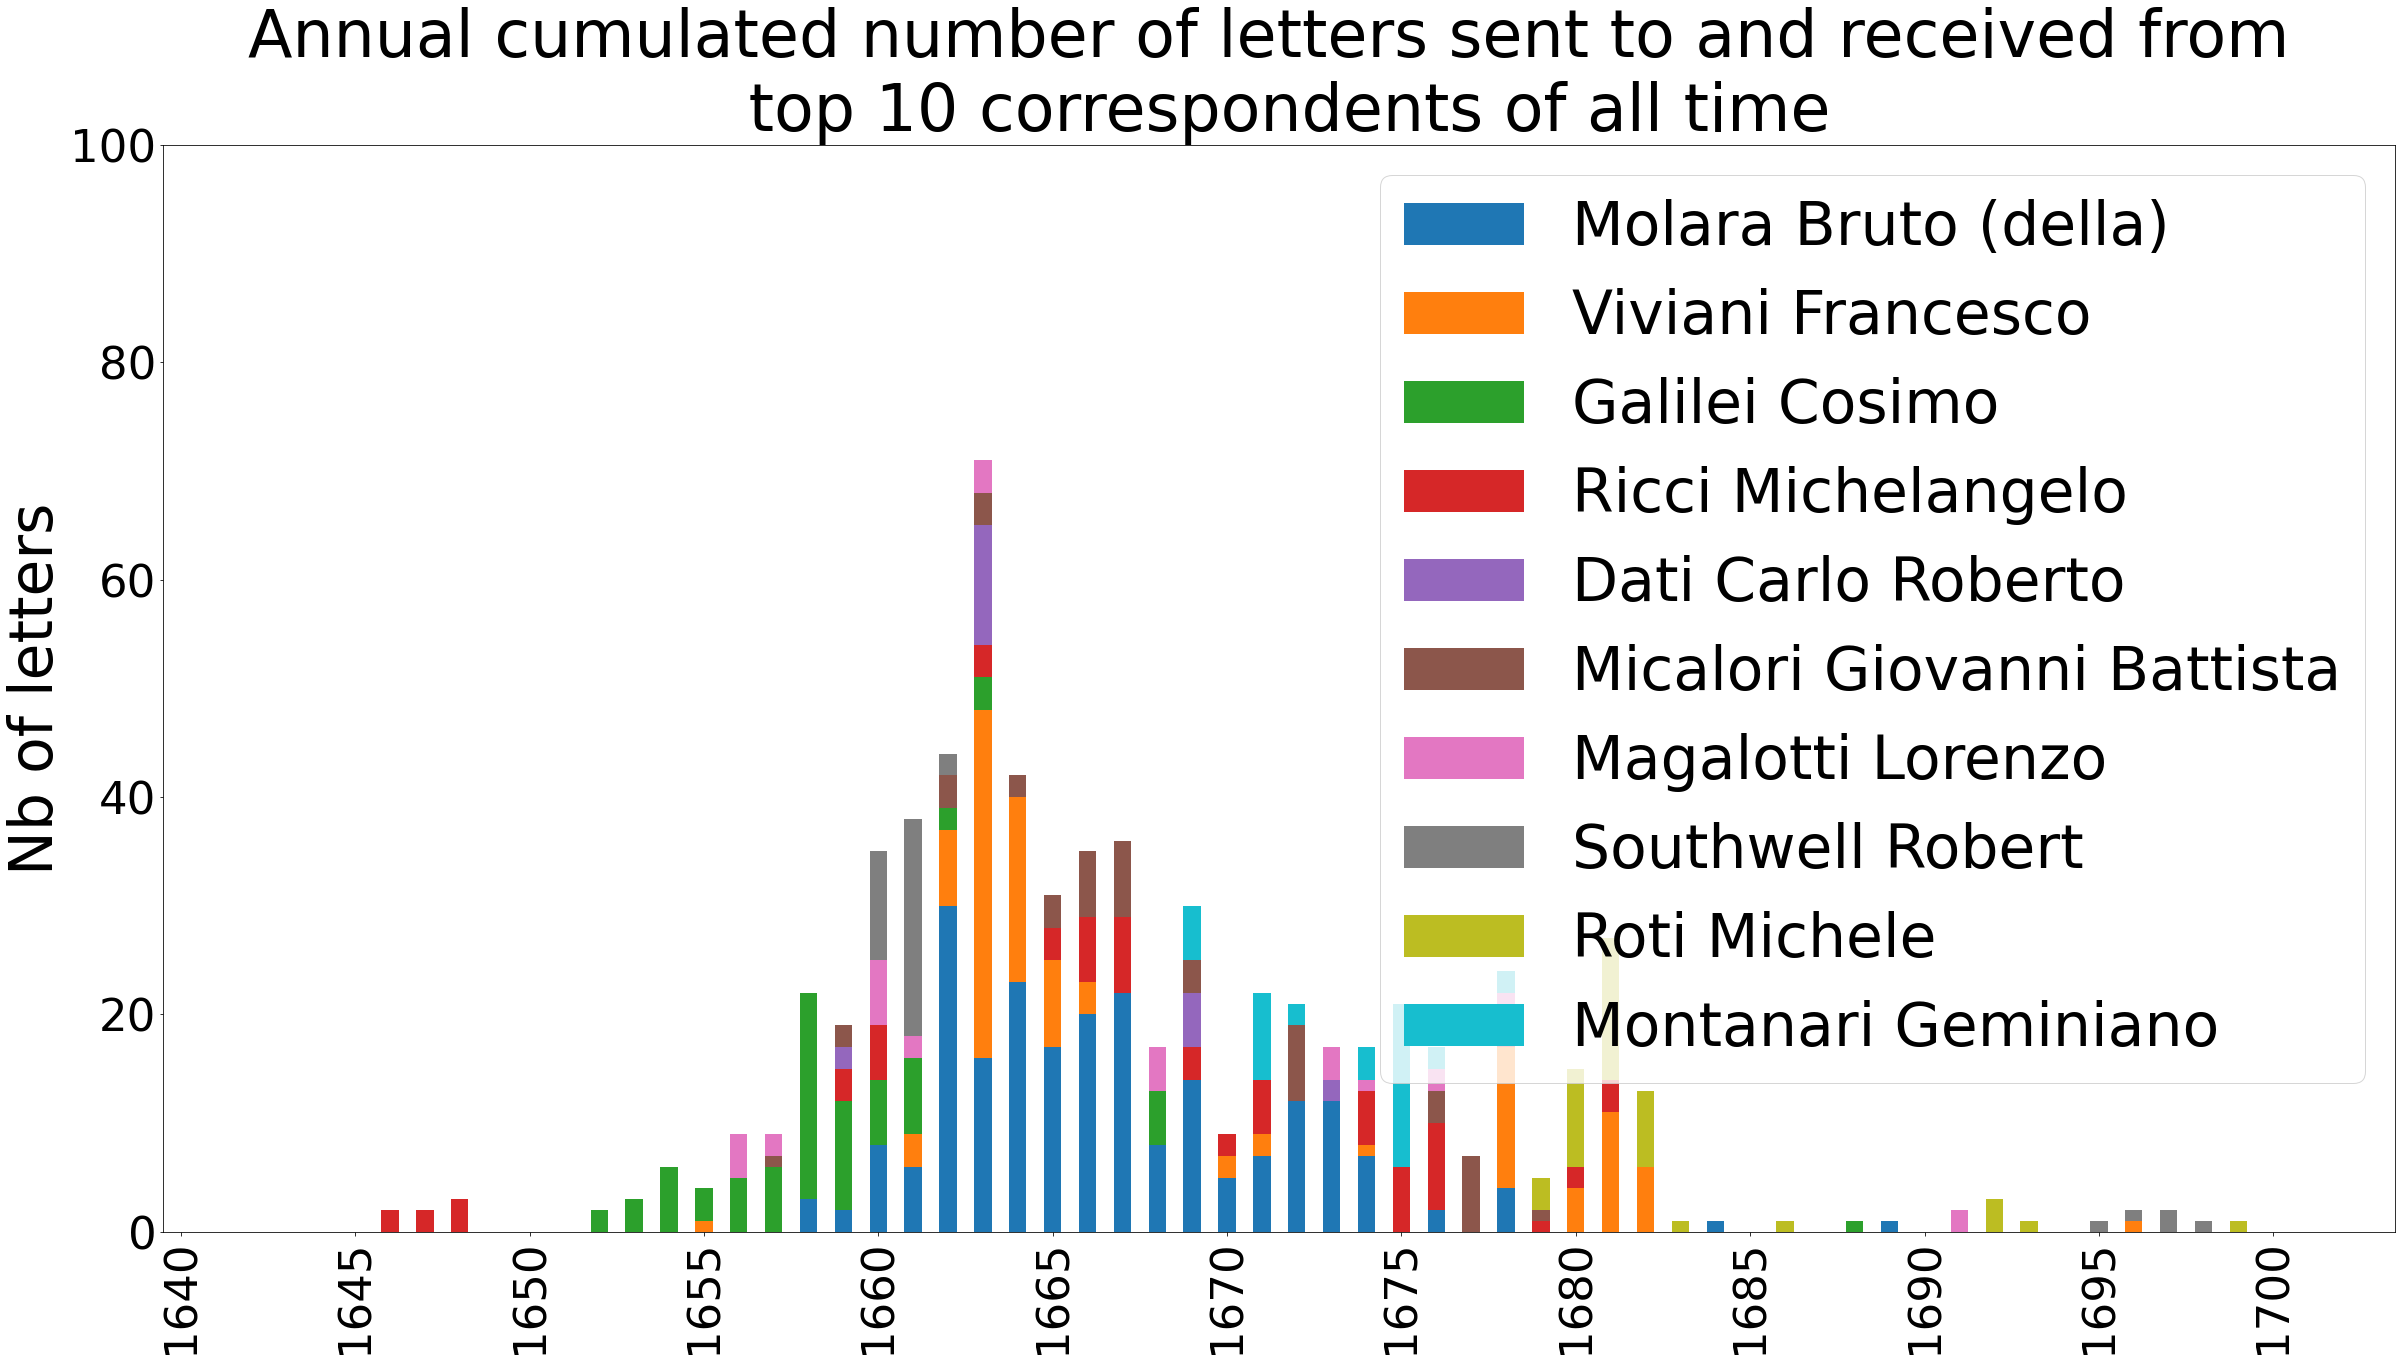

In [387]:
final_hist.plot.bar(stacked = True, figsize=(40, 20))
#plt.tight_layout()
plt.ylim(0, 100)
plt.legend(loc=1, prop={'size': 60})
plt.ylabel('Nb of letters', fontsize=60)

plt.tick_params(axis='both', which='major', labelsize=45)
plt.locator_params(axis='x', nbins=15)
plt.title('Annual cumulated number of letters sent to and received from \n top 10 correspondents of all time', fontsize=65)

plt.savefig('histo top 10')

# Total letters sent and received per year

In [329]:
sent_count = pd.DataFrame(columns = ['Nb Received'])
received_count = pd.DataFrame(columns = ['Nb Sent'])

for i in range(1640 , 1704, 1):
    df1 = received.loc[received['Year'].astype(str).str.find(str(i))!= -1] 
    received_count.loc[i] = df1.shape[0]
    received_count.loc[i].name = i
    
    df2 = sent.loc[sent['Year'].astype(str).str.find(str(i))!= -1] 
    sent_count.loc[i] = df2.shape[0]
    sent_count.loc[i].name = i

sent_count = sent_count.fillna(0)
sent_count = sent_count.sort_index(ascending=True)
#sent_count

received_count = received_count.fillna(0)
received_count = received_count.sort_index(ascending=True)
#received_count

years_count = pd.concat([sent_count, received_count], axis=1, join="inner")
years_count

,Nb Received,Nb Sent
1640,0,1
1641,0,0
1642,0,2
1643,0,4
1644,1,5
...,...,...
1699,18,23
1700,25,20
1701,1,3
1702,0,4


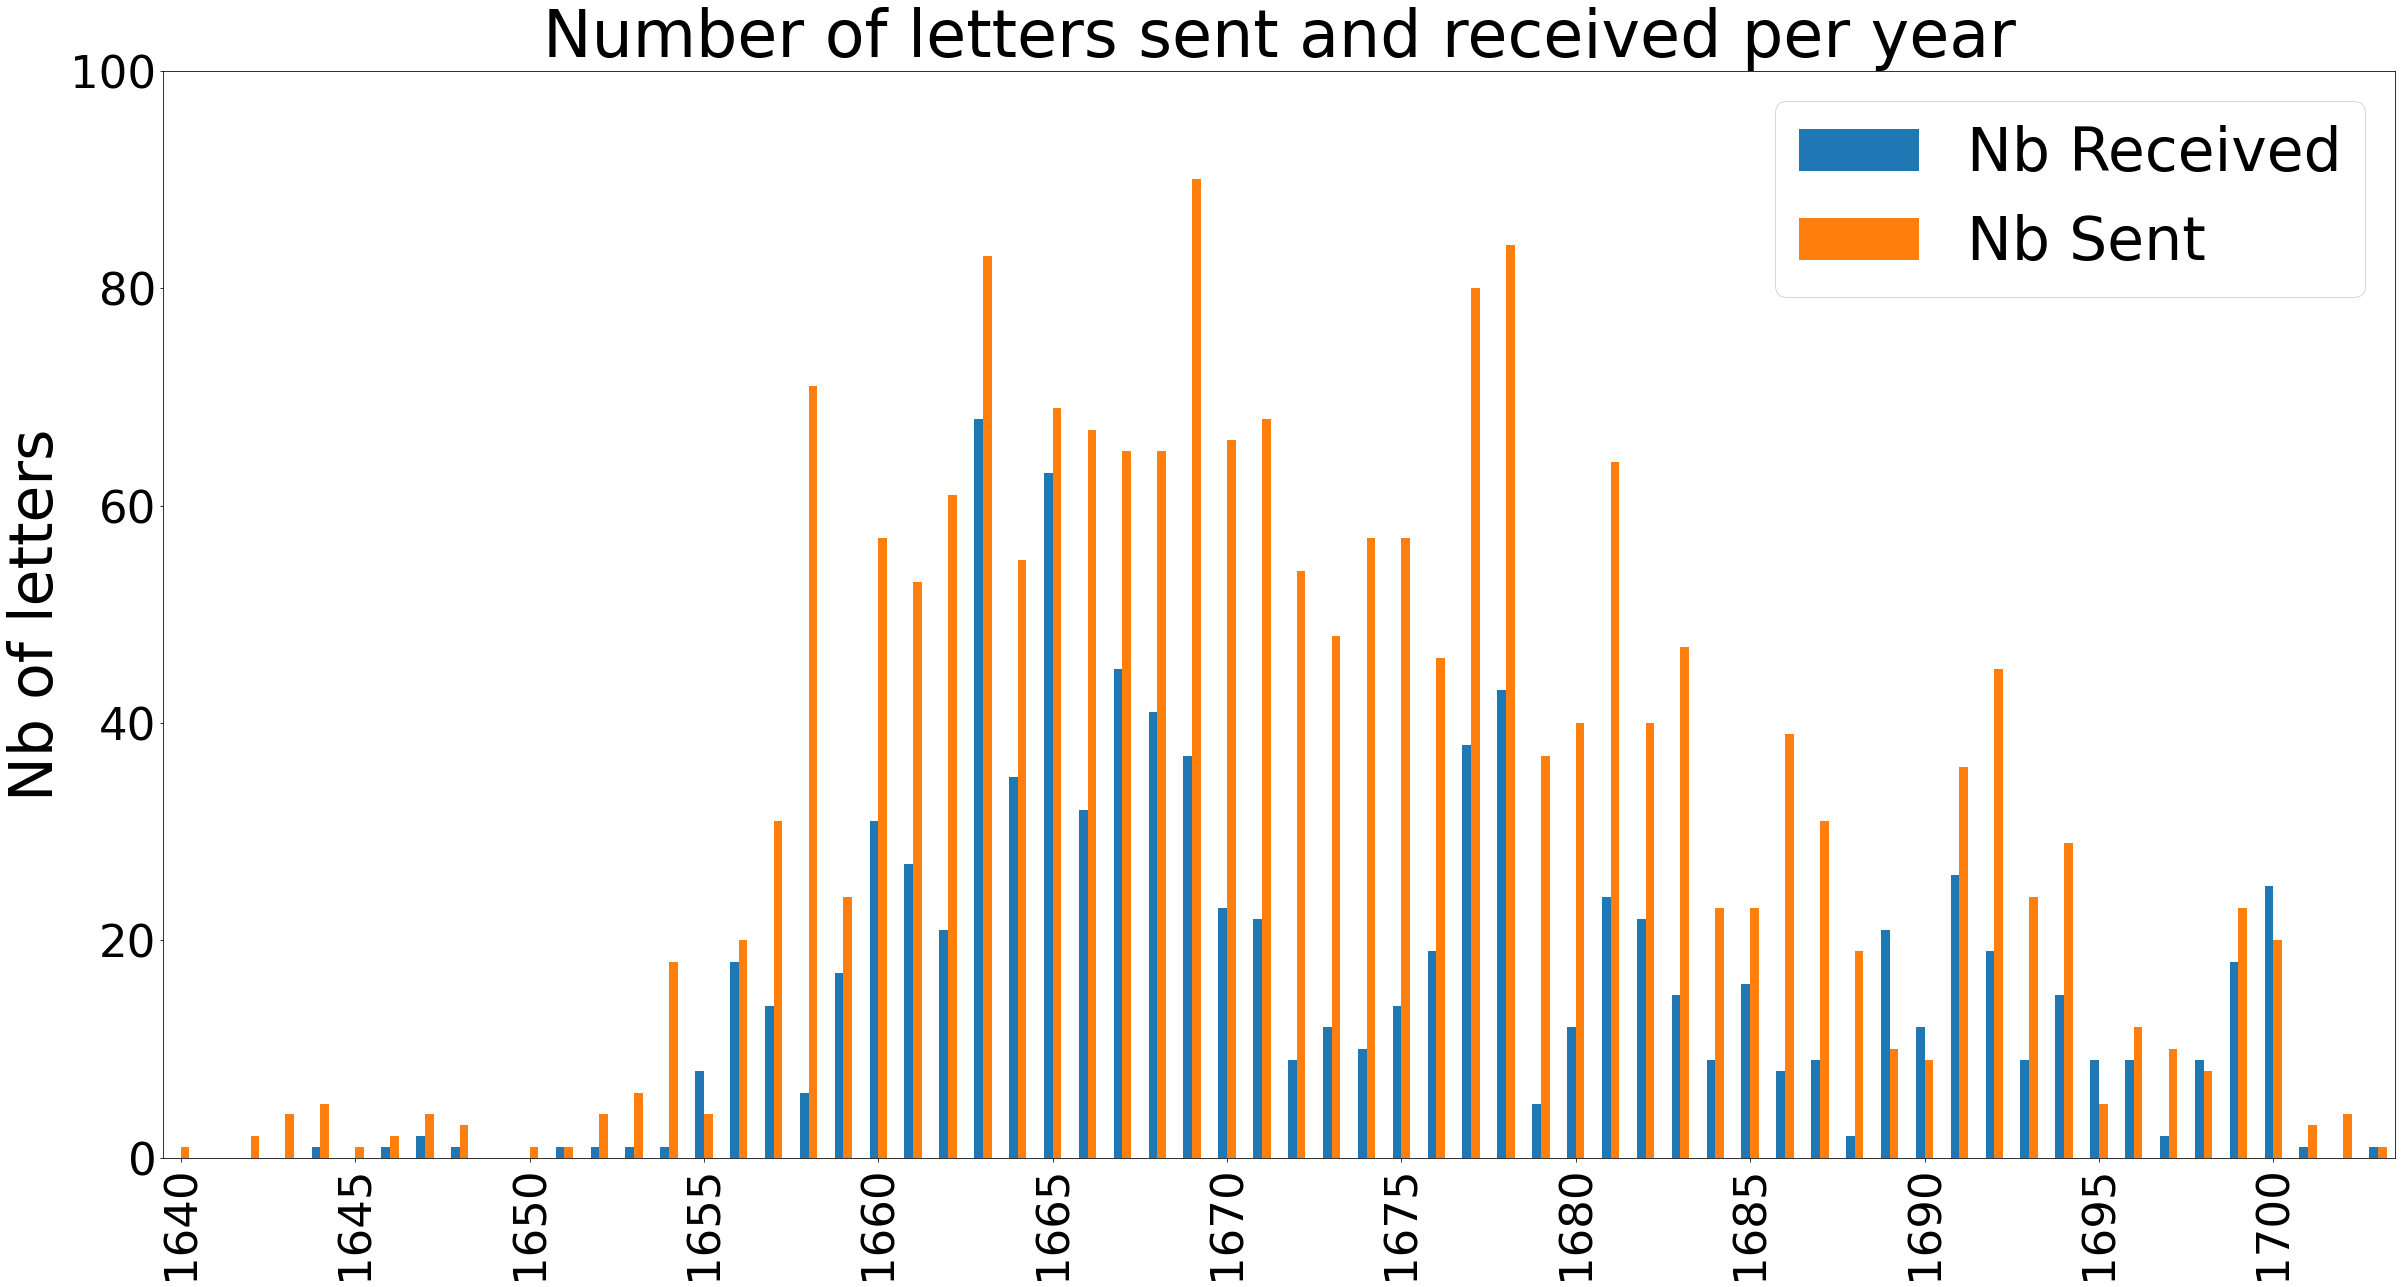

In [386]:
years_count.plot.bar(stacked = False, figsize=(40, 20))
#plt.tight_layout()
plt.ylim(0, 100)
plt.legend(loc=1, prop={'size': 60})
plt.ylabel('Nb of letters', fontsize=60)
plt.tick_params(axis='both', which='major', labelsize=45)
plt.locator_params(axis='x', nbins=15)
plt.title('Number of letters sent and received per year', fontsize=65)
plt.savefig('total letters per year')